In [1]:
import pandas as pd
import spacy

In [2]:
netflix = pd.read_csv("C:/Users/Hp Pc/Downloads/netflix_reviews.csv")

In [3]:
netflix

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,011732d9-d4f2-40ae-8c93-51e9e65a77a9,Pravin Pujari,Search and browse content is so pathetic and r...,1,0,8.135.1 build 7 50902,2024-10-13 14:23:55,8.135.1 build 7 50902
1,7a03facb-7c4d-43e4-9f6d-a8288bcfb1c2,Lunje liya,YOUR A NNNNNNNOOOOOOOOOBBBBBBBB!!!!!!!!!!! 😂😂😂...,5,0,8.92.0 build 8 50533,2024-10-13 14:22:22,8.92.0 build 8 50533
2,c79d34fa-1b5d-4ee1-8237-07d8041a17d1,Yash Patel,Best watching platform,5,0,NaN,2024-10-13 14:22:05,NaN
3,f76c20cf-b947-4fe9-8389-3c2b12646f10,Taylor Frantz,"I am the account holder, and it keeps saying I...",1,0,8.135.1 build 7 50902,2024-10-13 14:21:41,8.135.1 build 7 50902
4,17aef5ef-7b78-45fe-993e-0bd20450ccd7,Zia Ramdhary,I Love love it but I don't like the fact that ...,4,0,8.78.0 build 16 50463,2024-10-13 14:16:46,8.78.0 build 16 50463
...,...,...,...,...,...,...,...,...
116377,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
116378,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
116379,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
116380,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


EDA

In [4]:
netflix.dtypes

reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtype: object

In [5]:
duplicates = netflix[netflix.duplicated()]

netflix = netflix.drop(duplicates.index, axis=0)
netflix.reset_index(drop=True, inplace=True)

score
1    45566
5    33385
4    14062
3    12122
2    10960
Name: count, dtype: int64


<Axes: title={'center': 'Rating Distribution'}, xlabel='score'>

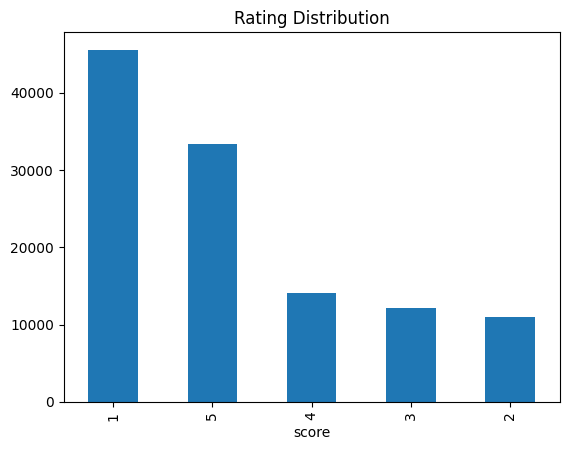

In [6]:
score_distribution = netflix['score'].value_counts()

print(score_distribution)
score_distribution.plot(kind='bar', title = 'Rating Distribution')


<Axes: title={'center': 'Thumbs_Up Count'}, xlabel='thumbsUpCount'>

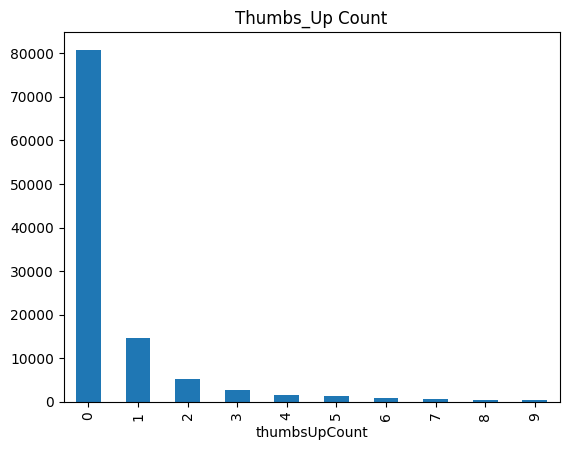

In [7]:
#so much zero reaction/like to the posts 
reaction = netflix['thumbsUpCount'].value_counts().head(10)

reaction.plot(kind='bar', title = 'Thumbs_Up Count')

score
1    29135
5    26229
4    10392
3     8332
2     6699
Name: count, dtype: int64


<Axes: title={'center': 'rating scores during Zero likes'}, xlabel='score'>

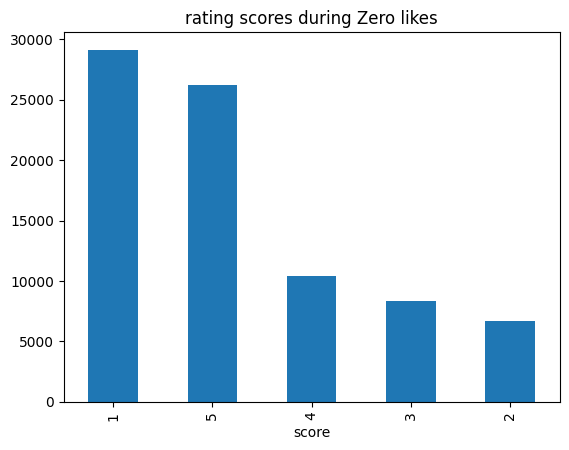

In [8]:
#the rating scores during Zero likes

rating_zero_reaction = netflix[netflix['thumbsUpCount'] == 0]['score'].value_counts()

print(rating_zero_reaction)
rating_zero_reaction.plot(kind='bar', title = 'rating scores during Zero likes')

In [9]:
netflix['at'] = pd.to_datetime(netflix['at'])

In [10]:
netflix['year'] = netflix['at'].dt.year
netflix['month'] = netflix['at'].dt.month

In [11]:
import matplotlib.pyplot as plt

<BarContainer object of 116095 artists>

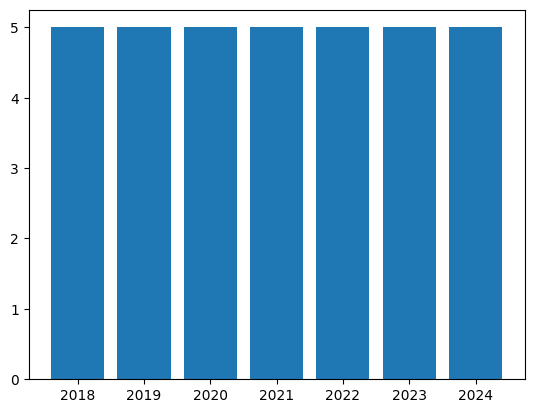

In [12]:
plt.bar(x=netflix['year'], height=netflix['score'])

In [13]:
netflix = netflix[['content', 'at', 'year', 'month', 'score', 'thumbsUpCount']]

In [14]:
netflix.isnull().sum()

content          2
at               0
year             0
month            0
score            0
thumbsUpCount    0
dtype: int64

In [15]:
netflix = netflix[~netflix['content'].isnull()]

In [16]:
def Emotion(rating):
    if rating <= 2:
        return 0
    else:
        return 1


netflix['class'] = netflix['score'].apply(Emotion)

In [17]:
netflix.sample(5)

,content,at,year,month,score,thumbsUpCount,class
112708,Pay more and get ads for games.,2023-09-13 04:42:07,2023,9,1,0,0
14127,its very good for entertainment find movies yo...,2024-02-17 16:20:40,2024,2,5,0,1
24847,"For some reason the app keeps signing me out, ...",2023-03-31 14:44:24,2023,3,2,8,0
100287,I'm not able to playback in hd in redmi note 1...,2023-09-22 18:38:30,2023,9,3,0,1
94783,Very bad. Please don't download waste your mb ...,2024-02-06 07:54:20,2024,2,1,0,0


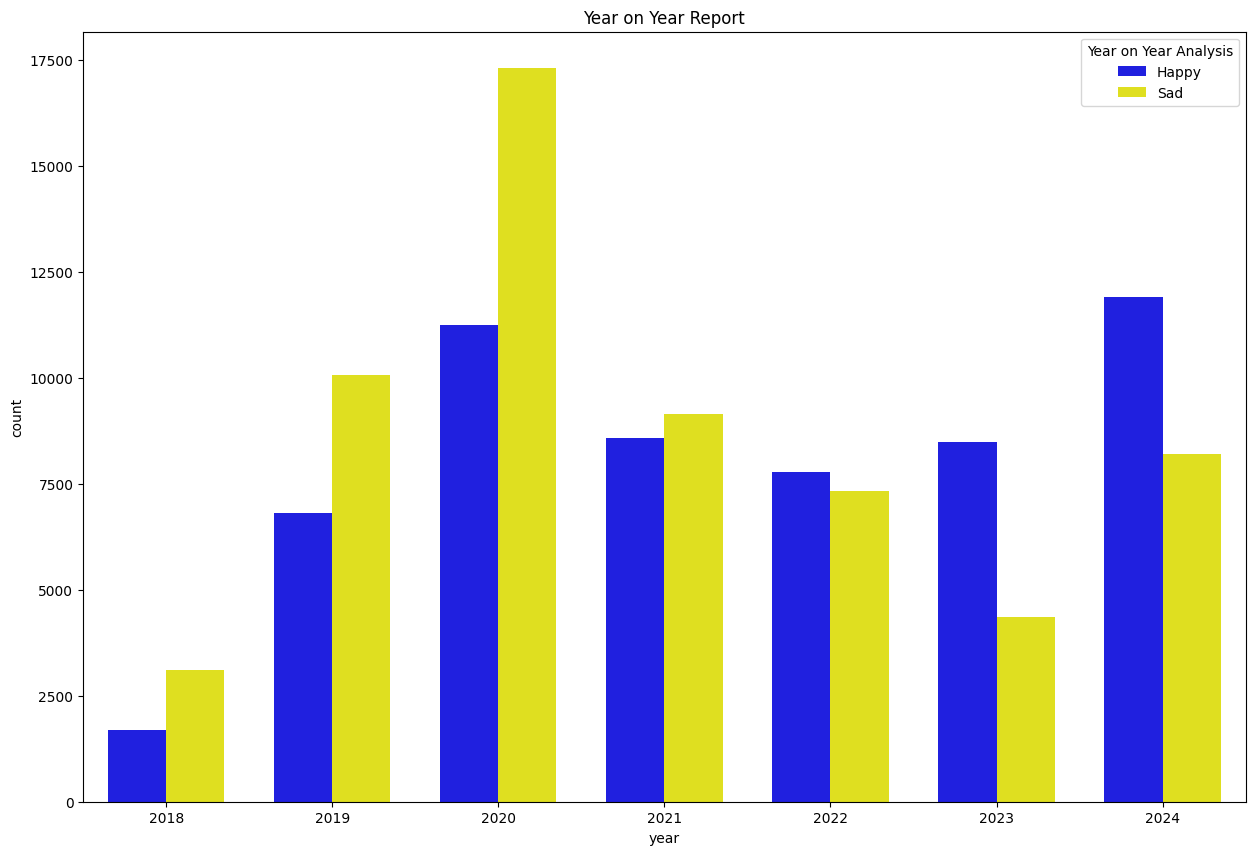

In [20]:
import seaborn as sns

plt.figure(figsize=(15,10))
year_emotion = netflix[['year', 'class']].sort_values('year')

plot = sns.countplot(data=year_emotion, x='year', hue='class', width=0.7, palette=['blue', 'yellow'])
plot.legend(title='Year on Year Analysis', labels=['Happy', 'Sad'])
plt.title('Year on Year Report')
plt.show()

#2020 report skyrocketed due to Covid-19